# Vanilla Model for baseline comparison
Python 3.6

Pytorch 0.4.1

CUDA 9.2


### Loading all required Library functions

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import checkFile
import accuracyCheck
import LossCheck
import Train
import Net

%load_ext autoreload
%autoreload 2

### Checking if device has a supported GPU

In [2]:
# # Check for CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# # Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)

cuda:0


### Setting Parameters

In [3]:
# Parameters
batch_size = 100
valid_size = 1000
Epoch = 20

### Loading training, validation & test datasets

In [4]:
# Loading datasets & class labels
trainloader, validloader, testloader, classes = checkFile.initFiles(batch_size, valid_size)

Files already downloaded and verified
TrainData Done
Size Train Data: 50000
TrainLoader Done
Size Train: 490
ValidLoader Done
Size Train: 10
Files already downloaded and verified
TestSet Done
Size Train: 10000
TestLoader Done
Size Train: 100


### Defining the NN

In [5]:
net = Net.Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
  (maxOut1): MaxOut()
)

### Initializing vectors to store Accuracy & Loss

In [6]:
# Initialize Accuracy List
trainAccuracy = np.zeros(1)
validAccuracy = np.zeros(1)

# Initialize Loss List
trainLoss = np.zeros(1)
validLoss = np.zeros(1)

### Training the NN
Using Adam Optimization parameters

Learning Rate =  1e-3 

Betas         = (0.9, 0.999)

In [7]:
# Train your model
for epoch in range(Epoch):  # loop over the dataset multiple times

    trainLossTemp, net = Train.train(trainloader, net, 'Training', epoch)
    trainLoss = np.append(trainLoss, trainLossTemp)
    validLoss = np.append(validLoss, LossCheck.lossCheck(validloader, net, 'Validation', epoch))

    trainAccuracy = np.append(trainAccuracy, accuracyCheck.accuracyCheck(trainloader, net, 'Training'))
    validAccuracy = np.append(validAccuracy, accuracyCheck.accuracyCheck(validloader, net, 'Validation'))

print('Fin...')

[1,   490] Training loss: 1.005
[1,    10] Validation loss: 1.038
Accuracy of the network on the Training images: 59 %
Accuracy of the network on the Validation images: 56 %
[2,   490] Training loss: 1.071
[2,    10] Validation loss: 0.935
Accuracy of the network on the Training images: 66 %
Accuracy of the network on the Validation images: 66 %
[3,   490] Training loss: 0.855
[3,    10] Validation loss: 0.872
Accuracy of the network on the Training images: 69 %
Accuracy of the network on the Validation images: 66 %
[4,   490] Training loss: 1.008
[4,    10] Validation loss: 0.906
Accuracy of the network on the Training images: 73 %
Accuracy of the network on the Validation images: 71 %
[5,   490] Training loss: 0.985
[5,    10] Validation loss: 0.694
Accuracy of the network on the Training images: 74 %
Accuracy of the network on the Validation images: 71 %
[6,   490] Training loss: 0.578
[6,    10] Validation loss: 0.642
Accuracy of the network on the Training images: 76 %
Accuracy of

### Deleting the 1st value of the accuracy & loss vectors
Since the vector is initialized using zeros & rest are appended, we need to delete the 1st rogue variable.

In [8]:
# Deleting 1st index value
trainLoss = np.delete(trainLoss,0)
validLoss = np.delete(validLoss,0)
trainAccuracy = np.delete(trainAccuracy,0)
validAccuracy = np.delete(validAccuracy,0)

# Saving the network
torch.save(net, './Save')


### Plotting the Accuracy & Loss Vs Epoch

Text(0,0.5,'Accuracy')

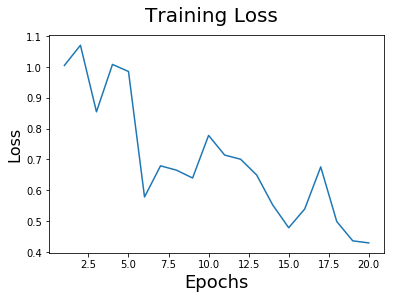

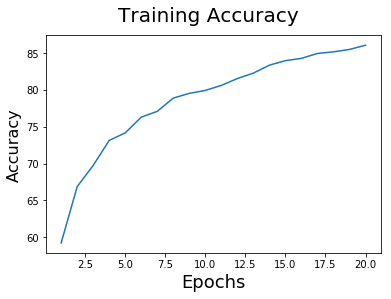

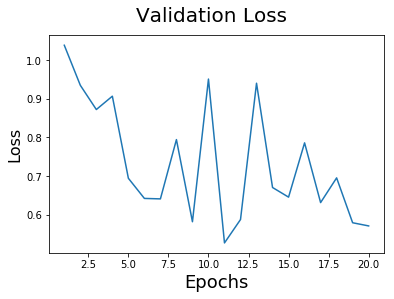

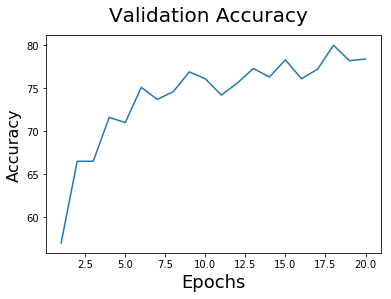

In [9]:
# Plots

# Making X axis
xAxis = np.arange(1, Epoch + 1 )


# Training loss vs. epochs
fig1 = plt.figure()
plt.plot(xAxis, trainLoss)
fig1.suptitle('Training Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Training accuracy vs. epochs
fig2 = plt.figure()
plt.plot(xAxis, trainAccuracy)
fig2.suptitle('Training Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

# Validation loss vs epochs
fig3 = plt.figure()
plt.plot(xAxis, validLoss)
fig3.suptitle('Validation Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)

# Validation accuracy vs. epochs
fig4 = plt.figure()
plt.plot(xAxis, validAccuracy)
fig4.suptitle('Validation Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)